Principal Component Analysis (PCA)
==============================

Let's say that we have a data set to train a machine learning algorithm. A data set usually takes the form of a two-dimensional array where every row is an instance, experiment, observation, or any term that may comfort you, and each column represents the variable, feature, parameter, or, as before, any name that may comfort you.

Typically, not all columns are mutually independent; instead, they are correlated to each other to some degree. It means that not all columns may be needed when training an algorithm when there are columns that are highly correlated to one another. If there is a way to remove such correlation and make every column mutually independent, then we may be able to reduce the number of columns, i.e., reduce the dimension. It can be done by PCA.

In mathematical language, PCA is an orthogonal projection of an $m$-dimensional vector on to some $l$-dimensional subspace, where $l\leqslant m$. If $l$ is smaller than $m$, then we can benefit from the dimension reduction, while $l=m$ is still good because every column becomes linearly independent to each other after PCA so that the multicollinearity is naturally resolved.

PCA typically follows the following steps

### 1. Normalize

Let's say that a data set $\mathbf{X}^b\in\mathbb{R}^{n\times m}$is given. The superscript $b$ stands for raw data. I will use superscript $a$ for normalized data and no superscript for the final data.

$\mathbf{X}^b$ has $n$ experimental data and $m$ variables. We want to train a machine learning algorithm with it. What we have to do is normalization of data so that the data to have the mean at 0 and a standard deviation of 1, i.e.:

\begin{gather}
\mathbf{x}^a_j=\frac{\mathbf{x}^b_j-\mathrm{mean}\left(\mathbf{x}^b_j\right)\mathbf{1}}{\sigma\left(\mathbf{x}^b_j\right)}
\end{gather}

Here, $\mathbf{x}^a_j\in\mathbb{R}^n$ is the normalized column vector, mean$\left(\mathbf{x}^b_j\right)$ is the mean of $\mathbf{x}^b_j$ which is a scalar, $\mathbf{1}\in\mathbb{R}^n$ is a vector where all entries are 1, and $\sigma\left(\mathbf{x}^b_j\right)$ is the standard deviation of $\mathbf{x}^b_j$. The resulting new matrix $\mathbf{X}^a=\left[~\mathbf{x}^a_1~\cdots~\mathbf{x}^a_m~\right]$ possesses identical information to $\mathbf{X}^b$ but it is column-wise normalized.

These are implemented as follows. First, read the data set.

In [0]:
# This data set is from the University of California, Irvine Machine Learning Repository.
# Last column of this data set is the make and name of the cars, which will not be used in this example.

import pandas as pd

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",names=column_names,na_values="?",comment="\t",sep=" ",skipinitialspace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [0]:
# Let's do some pre-processing on the data set before starting PCA.
# There are nan values in the data.
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
# Let's remove them.
import numpy as np

a = df.shape
df.dropna(inplace=True)
print("Size was {}".format(a)+" is now {}".format(df.shape))

Size was (398, 8) is now (392, 8)


In [0]:
# "Origin column" is categorical. Let's remove it from the data frame and attach it after PCA.
origin = df.pop("Origin")
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


<p>We normalize this.</p>


In [0]:
X_norm = (df-df.mean())/df.std()
X_norm.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241


### 2. Covariance Matrix

Next, we need to compute the covariance between each column. The definition of covariance is

\begin{gather}
\mathbf{Cov}=\frac{1}{n-1}\mathbf{X}^{aT}\mathbf{X}^a
\end{gather}

but the DataFrame class in `pandas` already has covariance method. So we do it in following way.

In [0]:
cov = X_norm.cov()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(cov)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


We see that the off-diagonal elements are very large (far from 0 and close to 1) which indicates the PCA would be meaningful.

### 3. Eigenvalue Decomposition

Now, it is time to analyze and obtain the principal components. Actually, the eigenvalue decomposition is everything you need to do.

\begin{gather}
\mathbf{Cov}=\mathbf{V}\boldsymbol{\Lambda}\mathbf{V}^T.
\end{gather}

Here, $\mathbf{V}$ is a matrix that has eigenvectors of $\mathbf{C}$ as its column vectors and $\boldsymbol{\Lambda}$ is a diagonal matrix having eigenvalues as its entries. Algebraic and geometric multiplicities are not strictly considered. Actually, for the real world data, it is rare to see such situation unless there are duplicated columns exist in the data set $\mathbf{X}^b$.

The eigenvalues are, in fact, the variance, or importance, of corresponding the eigenvector, and the corresponding eigenvector is the *recipe* to generate the corresponding prinicpal component: dot product of row $i$ in $\mathbf{X}^a$ and eigenvector 1 yield principal component 1. In general

\begin{gather}
\mathbf{x}_i=\mathbf{x}^a_i\mathbf{V}.
\end{gather}
  
To represent whole data by PCA, one should choose all the principal components to create a new data set. Such approach would not be able to reduce the dimension, however, this preprocessed data set is de-correlated and the learning algorithm should return better prediction with shorter training time. On the other hand, one could choose several significant PCs to approximately represent the data and reduce the dimension of input data set without loosing much information of $\mathbf{X}$.

`numpy` has `eig` method which does the work for you, but it is not sorted.

In [0]:
w, v = np.linalg.eig(cov)
for i in range(len(w)):
    print("norm of col {:1d} = {:.4f}, lambda={:.4f}".format(i,np.linalg.norm(v[:,i]),w[i]))

norm of col 0 = 1.0000, lambda=5.0106
norm of col 1 = 1.0000, lambda=0.8656
norm of col 2 = 1.0000, lambda=0.7284
norm of col 3 = 1.0000, lambda=0.1839
norm of col 4 = 1.0000, lambda=0.1219
norm of col 5 = 1.0000, lambda=0.0543
norm of col 6 = 1.0000, lambda=0.0353


We want to choose the first a few significant principal components, which is an easy task if the decomposition is sorted in descending order.

In [0]:
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[:,idx]
for i in range(len(w)):
    print("norm of col {:1d} = {:.4f}, lambda={:.4f}".format(i,np.linalg.norm(v[:,i]),w[i]))
column_names = ["eig{:1d}".format(i) for i in range(len(w))]
V = pd.DataFrame(v,columns=column_names)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(V)

norm of col 0 = 1.0000, lambda=5.0106
norm of col 1 = 1.0000, lambda=0.8656
norm of col 2 = 1.0000, lambda=0.7284
norm of col 3 = 1.0000, lambda=0.1839
norm of col 4 = 1.0000, lambda=0.1219
norm of col 5 = 1.0000, lambda=0.0543
norm of col 6 = 1.0000, lambda=0.0353


,eig0,eig1,eig2,eig3,eig4,eig5,eig6
0,-0.398135,0.206759,-0.257215,-0.750966,-0.340776,0.209759,0.092212
1,0.416124,0.198541,0.139159,-0.477306,0.493222,-0.332548,0.431716
2,0.429283,0.180362,0.100316,-0.297847,0.056581,0.142967,-0.812877
3,0.422813,0.085242,-0.169684,0.042076,-0.711289,-0.522803,0.064385
4,0.414046,0.224675,0.276103,0.107735,-0.265158,0.696518,0.367154
5,-0.284897,-0.006972,0.893308,-0.121124,-0.230755,-0.223785,-0.052799
6,-0.229510,0.909675,-0.037246,0.302435,0.088961,-0.128195,-0.051132


Now, let's see how each principal components are important than the others. First, we convert the eigenvalues into the percentage, and also compute the cumulative percentages as follows.


In [0]:
z = w/sum(w)*100
z_cumul = np.cumsum(z)
for i in range(len(z)):
    print("{:d} {:8.4f} {:8.4f}".format(i,z[i],z_cumul[i]))

0  71.5805  71.5805
1  12.3656  83.9461
2  10.4056  94.3517
3   2.6274  96.9791
4   1.7417  98.7207
5   0.7751  99.4959
6   0.5041 100.0000


The first (0-th) principal component takes 67.20% of information while second has 11.80% and so on and so forth. If we include first 4 principal components, then we can represent more than 90% of information that was in the raw data $\mathbf{X}^b$. Let's do some plotting to visualize this.

(0, 107)

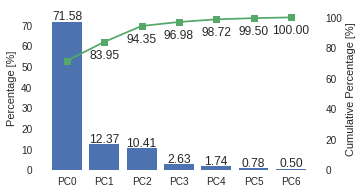

In [0]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(5,3))
ax2 = plt.twinx()
_ = plt.xticks(range(len(z)),["PC{:1d}".format(i) for i in range(len(z))])


plt.sca(ax1)
plt.bar(range(len(z)),z)
ax1.set_facecolor("None")
plt.grid(False)
for i in range(len(z)):
    plt.text(i,z[i]+1,"{:.2f}".format(z[i]),horizontalalignment="center")
plt.ylabel("Percentage [%]")
plt.ylim([0,79])

plt.sca(ax2)
plt.plot(range(len(z)),z_cumul,color="C1",marker="s")
ax1.set_facecolor("None")
plt.grid(False)
for i in range(1,len(z)):
    plt.text(i,z_cumul[i]-5,"{:.2f}".format(z_cumul[i]),horizontalalignment="center",verticalalignment="top")
plt.ylabel("Cumulative Percentage [%]")
plt.ylim([0,107])

# Uncomment below if you want to save the figure.
#plt.tight_layout()
#plt.savefig("significance-r200.png",dpi=200)

Good. Since we only have 8 columns in $\mathbf{X}^b$, we do not actually have to reduce the dimension, but when there are so many, PCA will tell you the number of principal components and its ability of data representation.

### 4. Preprocessing

The last step is to get PCA-ed data, $\mathbf{X}$. Simply do

\begin{gather}
\mathbf{X}=\mathbf{X}^a\mathbf{V}
\end{gather}

and that's it. Columns of $\mathbf{X}$ are the principal components and their importance are from the greatest (the first column) to the smallest (the last column). If $\mathbf{V}$, which is sorted in descending order, is used as a whole, than $\mathbf{X}$ has the same size as $\mathbf{X}^b$, the raw file, but if some of the columns in $\mathbf{V}$ are discarded, $\mathbf{X}$ will have the same number of columns as the column-discarded $\mathbf{V}$.

In [0]:
X_pca = X_norm.dot(v)
X_pca.head()

,0,1,2,3,4,5,6
0,2.631685,-0.927853,-0.533996,-0.744639,0.545311,0.094853,0.121922
1,3.489341,-0.804445,-0.648666,-0.494197,0.035590,-0.206870,-0.097737
2,2.966623,-0.880062,-0.957519,-0.718806,0.286542,-0.136413,0.059673
3,2.906483,-0.960493,-0.582209,-0.530810,0.283589,-0.292865,0.124362
4,2.900120,-0.951573,-1.053490,-0.564380,0.544107,0.001894,0.170608


That's it. We use $\mathbf{X}$ instead of $\mathbf{X}^a$ or $\mathbf{X}^b$ for the machine learning.

Let's check if the PCA-ed data doesn't have multicollinearity, i.e. covariance matrix is diagonal.

In [0]:
C = X_pca.cov()
C.values[C.values < 1e-14] = 0 # Supress small numbers to zero.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(C)

,0,1,2,3,4,5,6
0,5.010636,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.865591,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.728394,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.183915,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.121916,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.054257,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03529


Yes it is. And the diagonal entries are indeed the eigenvalues. Check it out.

In [0]:
for i, eigval in enumerate(w):
  print("lambda[{:1d}] = {:.4f}".format(i,eigval))

lambda[0] = 5.0106
lambda[1] = 0.8656
lambda[2] = 0.7284
lambda[3] = 0.1839
lambda[4] = 0.1219
lambda[5] = 0.0543
lambda[6] = 0.0353
